<a href="https://colab.research.google.com/github/milind9321/Mtech-mini-project/blob/main/LinearRegression_CropYield_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load dataset
file_path = 'data_season.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

In [ ]:
# Preprocessing
df['Soil type'] = df['Soil type'].fillna('Unknown')
df.rename(columns={'yeilds': 'yield'}, inplace=True)

In [ ]:
# ==================== Enhanced Visualization ====================
sns.set_theme(style='whitegrid')

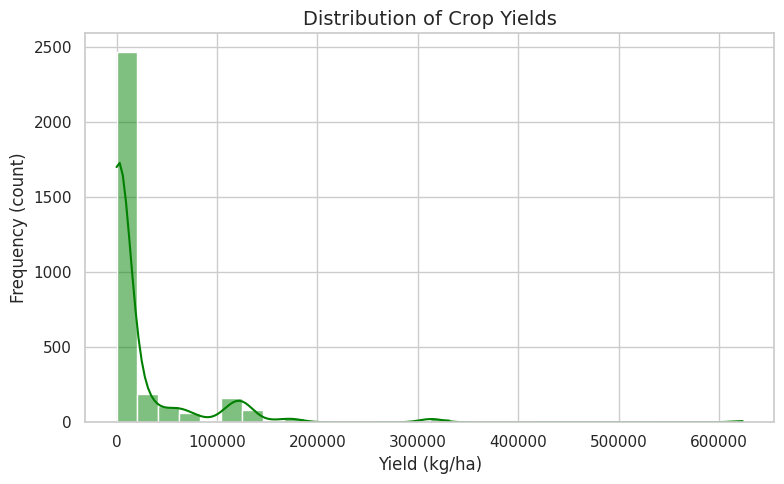

In [ ]:
# Plot 1: Yield Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['yield'], kde=True, color='green', bins=30)
plt.title('Distribution of Crop Yields', fontsize=14)
plt.xlabel('Yield (kg/ha)')
plt.ylabel('Frequency (count)')
plt.tight_layout()
plt.show()

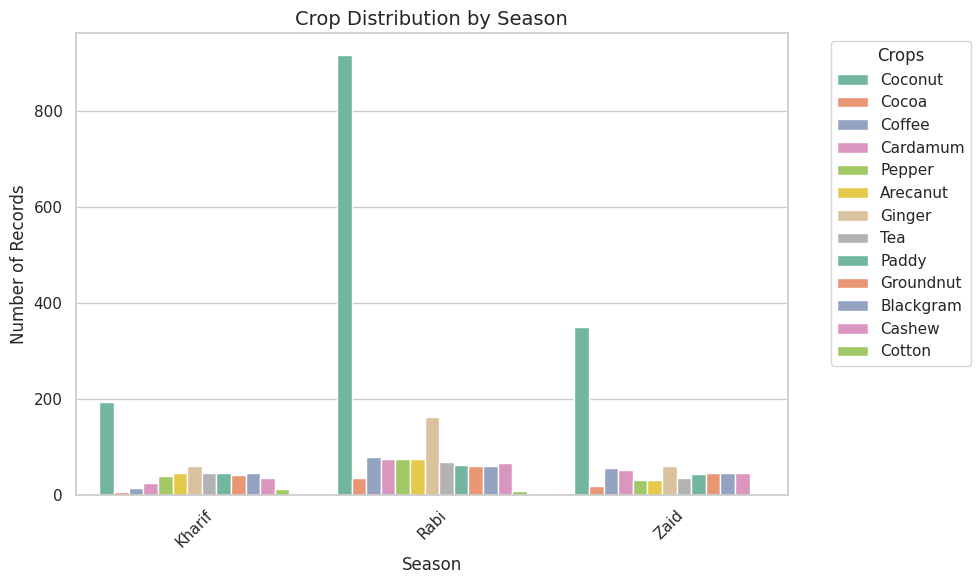

In [ ]:
# Plot 2: Crop Distribution by Season
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', hue='Crops', palette='Set2')
plt.title('Crop Distribution by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-7-3b6e8bc82529>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Soil type', y='yield', palette=['red', 'yellow', 'green', 'blue', 'purple', 'grey'])
<ipython-input-7-3b6e8bc82529>:3: UserWarning: 
The palette list has fewer values (6) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='Soil type', y='yield', palette=['red', 'yellow', 'green', 'blue', 'purple', 'grey'])


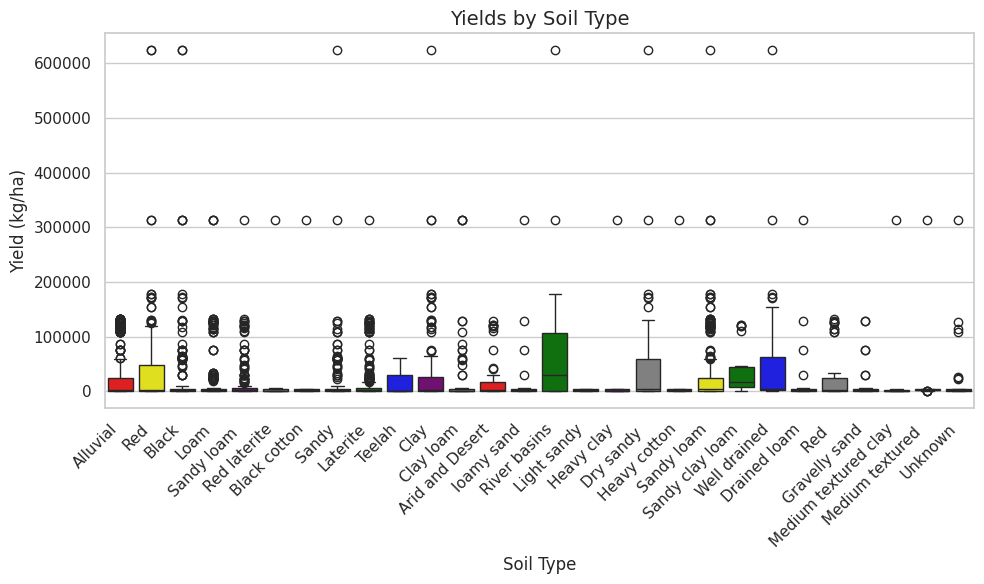

In [ ]:
# Plot 3: Yield by Soil Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Soil type', y='yield', palette=['red', 'yellow', 'green', 'blue', 'purple', 'grey'])
plt.title('Yields by Soil Type', fontsize=14)
plt.xlabel('Soil Type')
plt.ylabel('Yield (kg/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

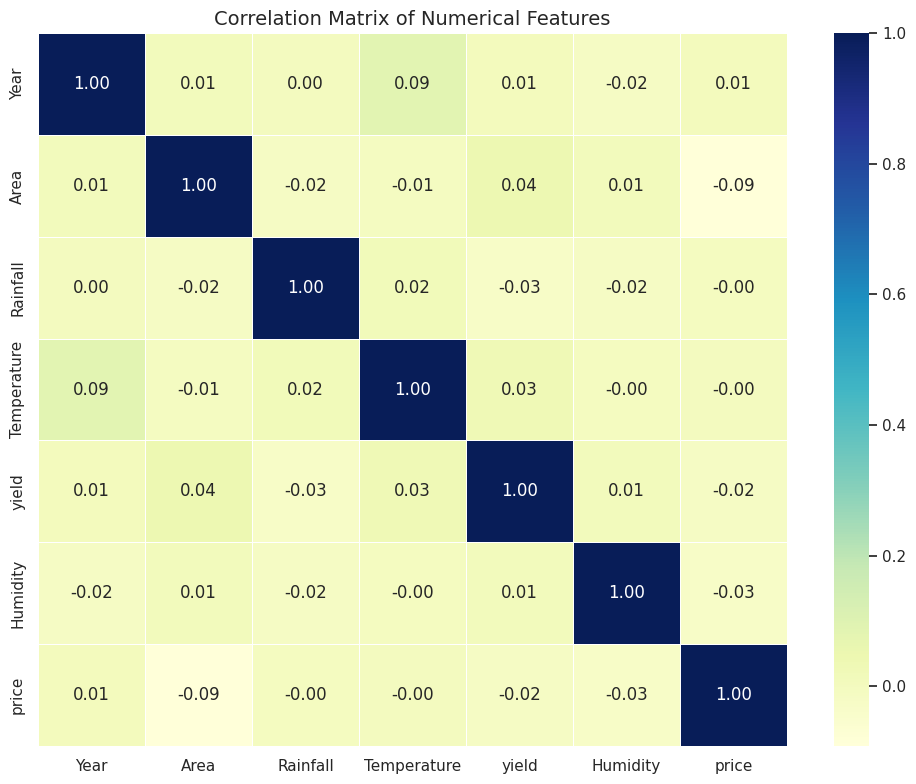

In [ ]:
# Plot 4: Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# ==================== Encoding and Scaling ====================
label_encoders = {}
categorical_features = ['Soil type', 'Crops', 'Location', 'Irrigation', 'Season']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Select features and target
X = df.drop(columns=['yield'])
y = df['yield']

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions and Evaluation
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


📊 Model Evaluation:
Mean Squared Error (MSE): 3450258929.9266
Root Mean Squared Error (RMSE): 58738.9047
Mean Absolute Error (MAE): 31901.4055
R-squared (R²) Score: -0.0258


In [ ]:

# ==================== Prediction Function ====================
def predict_yield(new_data):
    new_data_df = pd.DataFrame([new_data])
    for col in categorical_features:
        if col in new_data_df:
            if new_data_df[col][0] in label_encoders[col].classes_:
                new_data_df[col] = label_encoders[col].transform(new_data_df[col])
            else:
                print(f"⚠️ Warning: Unseen value '{new_data_df[col][0]}' for column '{col}'. Using most common value.")
                new_data_df[col] = label_encoders[col].transform([df[col].mode()[0]])

    # Handle missing columns if any
    missing_cols = set(X.columns) - set(new_data_df.columns)
    for col in missing_cols:
        new_data_df[col] = 0
    new_data_df = new_data_df[X.columns]

    new_data_scaled = scaler.transform(new_data_df)
    predicted_yield = lr_model.predict(new_data_scaled)
    print(f"\n🌾 Predicted Crop Yield: {predicted_yield[0]:.2f} kg/ha")
    return predicted_yield[0]


In [ ]:

# ==================== Dummy Input for Testing ====================
dummy_input = {
    'Soil type': 'Loam',
    'Crops': 'Coconut',
    'Location': 'Kodagu',
    'Irrigation': 'Drip',
    'Season': 'Zaid',
    'Temperature': 29,
    'Rainfall': 233,
    'Humidity': 57,
    'Area': 725,
    'Year': 2015,
    'price': 4000
}

print("\n🧪 Testing with Dummy Input:")
for key, val in dummy_input.items():
    print(f"{key}: {val}")

predict_yield(dummy_input)



🧪 Testing with Dummy Input:
Soil type: Loam
Crops: Coconut
Location: Kodagu
Irrigation: Drip
Season: Zaid
Temperature: 29
Rainfall: 233
Humidity: 57
Area: 725
Year: 2015
price: 4000

🌾 Predicted Crop Yield: 26088.60 kg/ha


np.float64(26088.600856952347)